In [1]:
import pandas as pd

# Load the dataset
file_path = 'station_sao_paulo.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1946,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,21.74,999.90,999.90,999.90,999.90,999.90
1,1947,999.90,23.54,21.04,19.74,19.24,999.90,15.04,16.44,18.04,17.04,18.94,20.34,22.75,20.01,15.67,18.01,19.11
2,1948,23.64,22.94,20.74,20.04,18.04,16.64,17.84,15.64,18.64,18.74,20.64,21.24,22.31,19.61,16.71,19.34,19.49
3,1949,22.34,21.54,23.54,19.44,17.24,17.34,16.34,17.34,18.24,18.74,19.74,21.54,21.71,20.07,17.01,18.91,19.42
4,1950,22.14,22.44,22.24,20.44,19.44,17.94,16.44,19.14,19.54,19.04,19.94,21.94,22.04,20.71,17.84,19.51,20.02


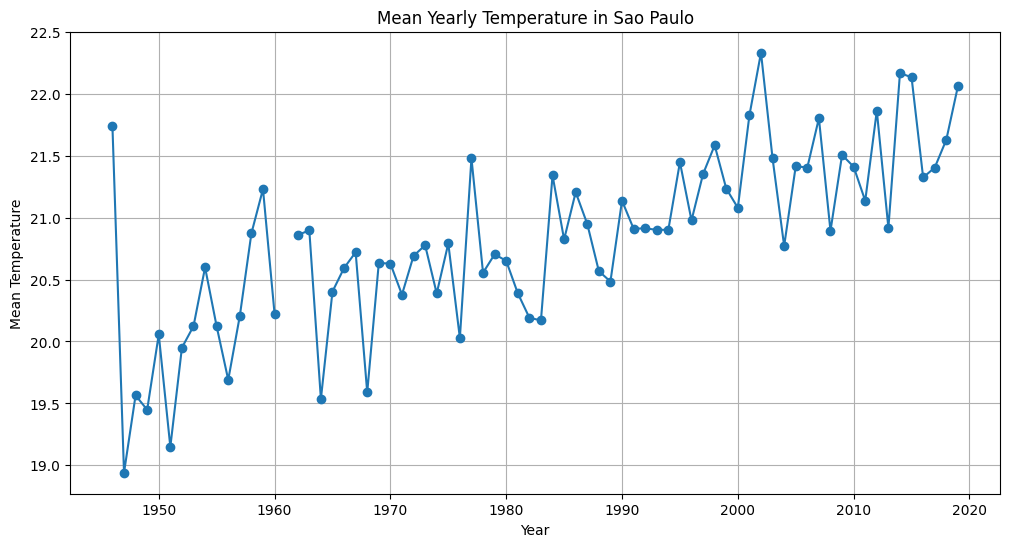

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Replace placeholder values with NaN
data.replace(999.90, np.nan, inplace=True)

# Calculate the mean for each year, ignoring NaN values
# We only take the monthly columns for the mean calculation
monthly_columns = data.columns[1:13]
data['YearlyMean'] = data[monthly_columns].mean(axis=1)

# Plot the mean values for each year
plt.figure(figsize=(12, 6))
plt.plot(data['YEAR'], data['YearlyMean'], marker='o', linestyle='-')
plt.title('Mean Yearly Temperature in Sao Paulo')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_1p8qs7/hh1ka8xo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_1p8qs7/7ck6nkjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85541', 'data', 'file=/tmp/tmpx_1p8qs7/hh1ka8xo.json', 'init=/tmp/tmpx_1p8qs7/7ck6nkjf.json', 'output', 'file=/tmp/tmpx_1p8qs7/prophet_modeldia2l4u1/prophet_model-20240320020603.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:06:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:06:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


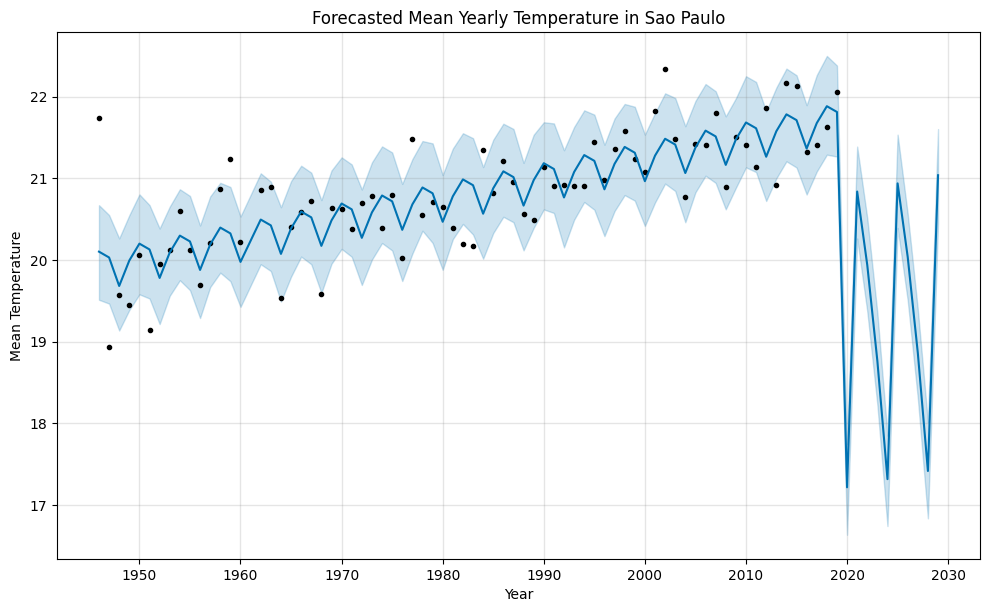

In [9]:
from prophet import Prophet

# Create a new DataFrame for Prophet
prophet_data = pd.DataFrame({
    'ds': data['YEAR'].astype(str) + '-01-01',  # create a full date string
    'y': data['YearlyMean']
})

# Initialize the Prophet model
model = Prophet()

# Fit the model with the data
model.fit(prophet_data)

# Create a future DataFrame for the next 10 years
future = model.make_future_dataframe(periods=10, freq='Y')

# Use the model to make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecasted Mean Yearly Temperature in Sao Paulo')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.show()

Too little data for using Prophet. Need to include all the monthly information.

In [26]:
import pandas as pd

# Load the data
file_path = 'station_sao_paulo.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1946,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,21.74,999.90,999.90,999.90,999.90,999.90
1,1947,999.90,23.54,21.04,19.74,19.24,999.90,15.04,16.44,18.04,17.04,18.94,20.34,22.75,20.01,15.67,18.01,19.11
2,1948,23.64,22.94,20.74,20.04,18.04,16.64,17.84,15.64,18.64,18.74,20.64,21.24,22.31,19.61,16.71,19.34,19.49
3,1949,22.34,21.54,23.54,19.44,17.24,17.34,16.34,17.34,18.24,18.74,19.74,21.54,21.71,20.07,17.01,18.91,19.42
4,1950,22.14,22.44,22.24,20.44,19.44,17.94,16.44,19.14,19.54,19.04,19.94,21.94,22.04,20.71,17.84,19.51,20.02


In [19]:
# Use a more direct approach to replace 999.90 with NaN to avoid recursion issues
data = data.applymap(lambda x: pd.NA if x == 999.90 else x)

# Melt the dataframe to convert it from wide to long format, suitable for time series
monthly_data = data.melt(id_vars=['YEAR'], value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                         var_name='MONTH', value_name='TEMP')

# Convert YEAR and MONTH to a datetime format to create a 'ds' column for Prophet
monthly_data['ds'] = pd.to_datetime(monthly_data['YEAR'].astype(str) + monthly_data['MONTH'], format='%Y%b')

# Now we have the 'ds' and 'y' columns required for Prophet
monthly_data = monthly_data[['ds', 'TEMP']].rename(columns={'TEMP': 'y'})

# Show the resulting dataframe
monthly_data.head()

,ds,y
0,1946-01-01,<NA>
1,1947-01-01,<NA>
2,1948-01-01,23.64
3,1949-01-01,22.34
4,1950-01-01,22.14


In [20]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model with the available data
# Prophet automatically handles missing data (NaNs)
model.fit(monthly_data.dropna())

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_1p8qs7/b4xj0mxv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx_1p8qs7/2bfqt1ga.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53220', 'data', 'file=/tmp/tmpx_1p8qs7/b4xj0mxv.json', 'init=/tmp/tmpx_1p8qs7/2bfqt1ga.json', 'output', 'file=/tmp/tmpx_1p8qs7/prophet_modelprh4mm0t/prophet_model-20240320021524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:15:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


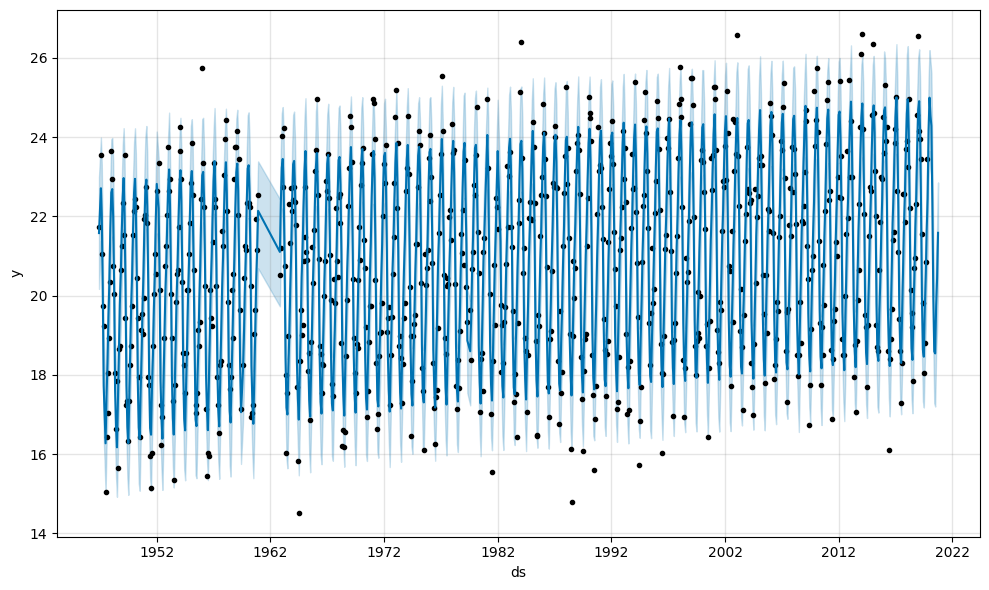

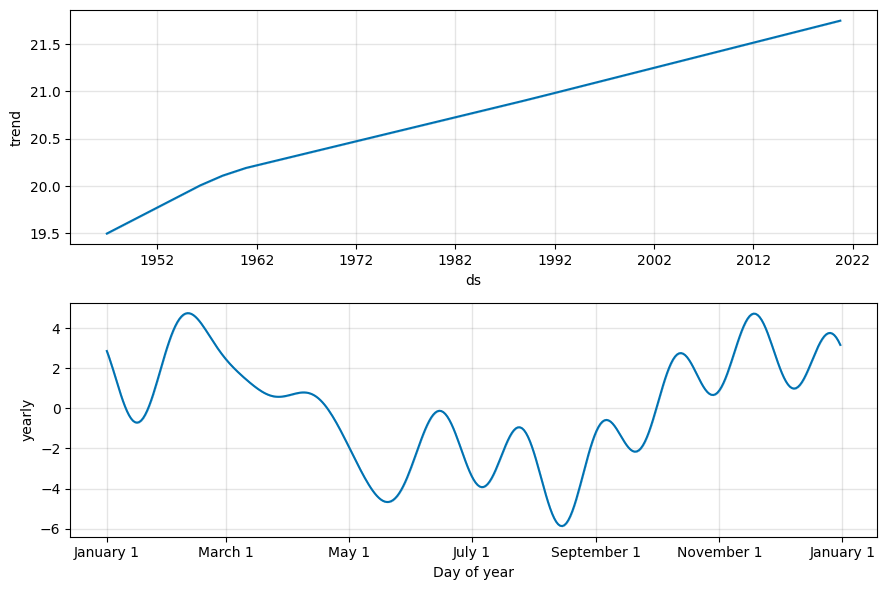

In [21]:
future = model.make_future_dataframe(periods=12, freq='M')  # for 12 months ahead, change as needed
forecast = model.predict(future)
fig = model.plot(forecast)
components_fig = model.plot_components(forecast)


Predictions for 2020 (in Celsius):

In [23]:
# Assuming 'forecast' is the dataframe returned by model.predict(future)
last_results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

print(last_results)

            ds       yhat  yhat_lower  yhat_upper
845 2020-05-31  18.591341   17.281361   19.980373
846 2020-06-30  18.539312   17.200374   19.988201
847 2020-07-31  19.748333   18.548997   21.092227
848 2020-08-31  20.439315   19.142106   21.733680
849 2020-09-30  21.582824   20.114390   22.853862
